In [67]:
'''
How to use Keras with the familiar Iris data set. 
We will compare networks with the regular Dense layer with different number of 
units and we will employ a Softmax activation function and the Adam optimizer.

'''

##### Based on:

# https://janakiev.com/notebooks/keras-iris/
#https://github.com/jakevdp/sklearn_tutorial
#https://nbviewer.jupyter.org/github/jakevdp/sklearn_tutorial/blob/master/notebooks/02.2-Basic-Principles.ipynb
#https://www.kaggle.com/lavajiit/deep-learning-iris-dataset-keras

#####

#Import basic libraries:

import IPython
import numpy as np
import scipy
import matplotlib
import sklearn

#Checking Installed versions:

print('IPython:', IPython.__version__)
print('numpy:', numpy.__version__)
print('scipy:', scipy.__version__)
print('matplotlib:', matplotlib.__version__)
print('scikit-learn:', sklearn.__version__)

from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from IPython.core.display import Image, display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


IPython: 7.11.1
numpy: 1.18.1
scipy: 1.4.1
matplotlib: 3.1.2
scikit-learn: 0.22.1


In [14]:
# Working with IRIS DATA SET

# load the data:
iris = datasets.load_iris()
print(iris.keys())
print(iris.feature_names)

# only print the first 10 samples
print(iris.data[:10])
print('We have %d data samples with %d features'%(iris.data.shape[0], iris.data.shape[1]))

print(iris.target_names)
print(set(iris.target))
print(iris.DESCR)

iris.target[[10, 25, 50]]
list(iris.target_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
We have 150 data samples with 4 features
['setosa' 'versicolor' 'virginica']
{0, 1, 2}
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== 

['setosa', 'versicolor', 'virginica']

In [34]:
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

'''
To prepare the data, we will simply use the OneHotEncoder to encode the integer features 
into a One-hot vector and we will use a StandardScaler 
to remove the mean and scale the features to unit variance. 
Finally we want to perform a train test split to compare our results later on.

'''

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

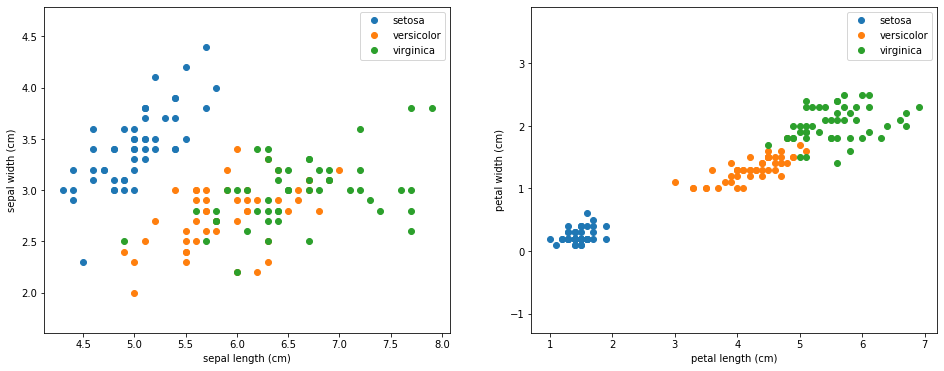

In [35]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

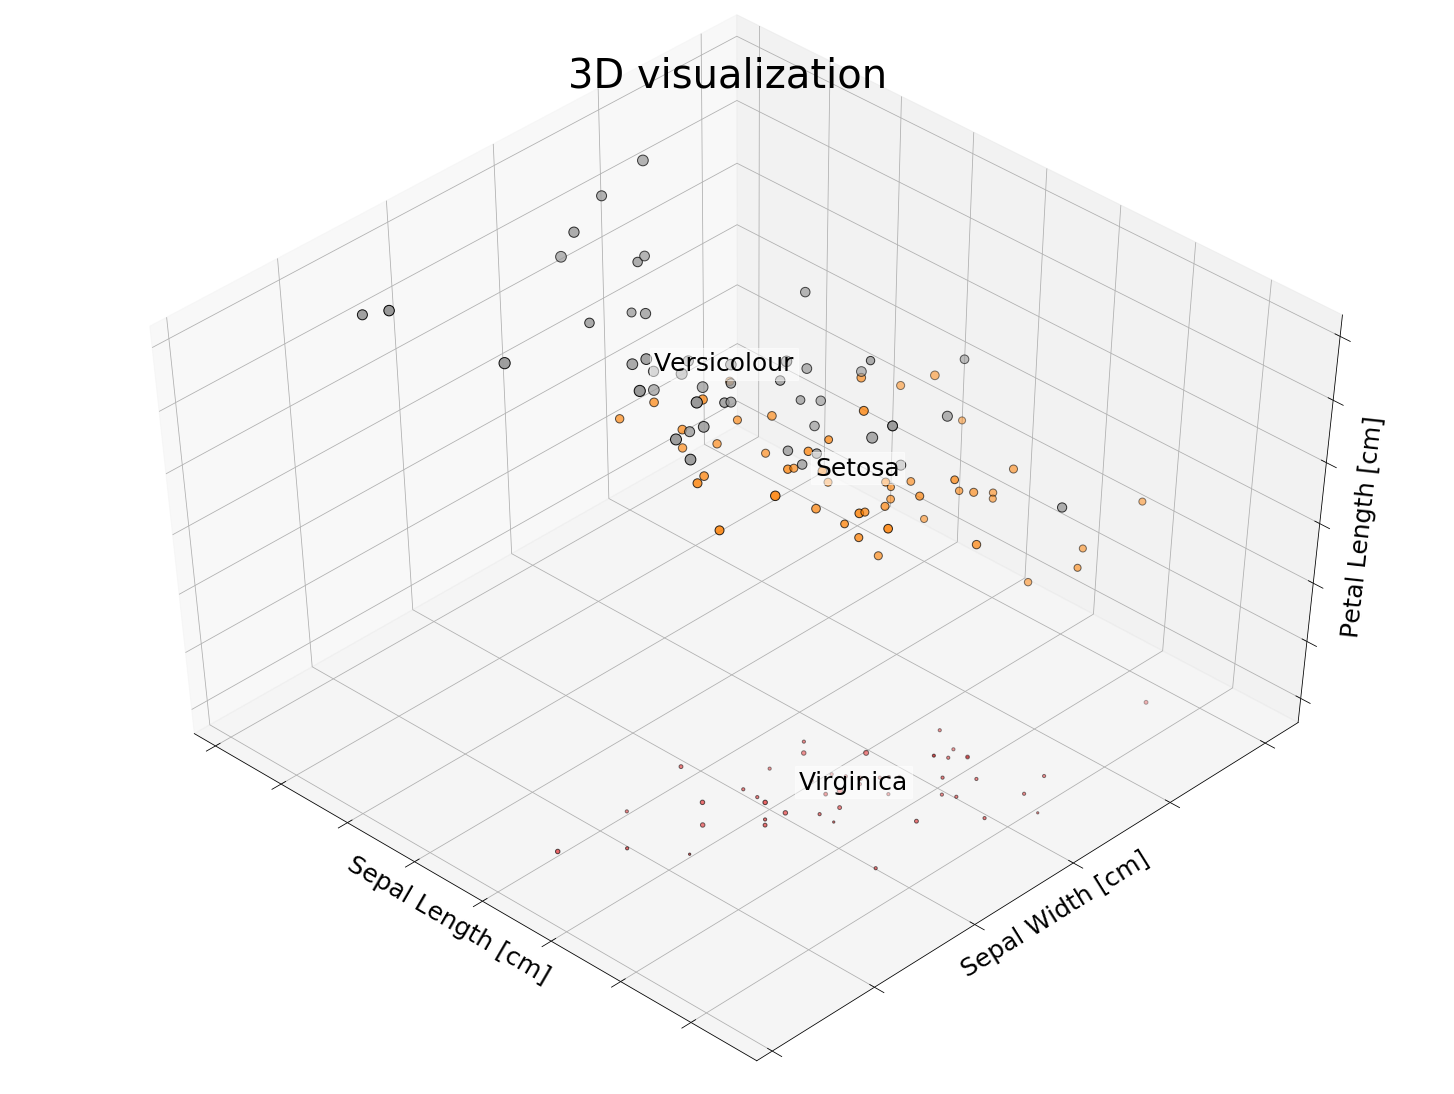

In [50]:
# 3d visualization

fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [36]:
#Using Keras

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

#Three different models with layers:
models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i))  for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-tr

In [115]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for j, create_model in enumerate(models):
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,batch_size=5,epochs=50,verbose=0,validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])    
    history_dict[model.name] = [history_callback, model]
    

Model name: model_1
75/75 [==============================] - 0s 111us/step
Test loss: 0.2840219432115555
Test accuracy: 0.9066666960716248
Model name: model_2
75/75 [==============================] - 0s 70us/step
Test loss: 0.23111025969187418
Test accuracy: 0.9333333373069763
Model name: model_3
75/75 [==============================] - 0s 113us/step
Test loss: 0.19101758788029352
Test accuracy: 0.9333333373069763


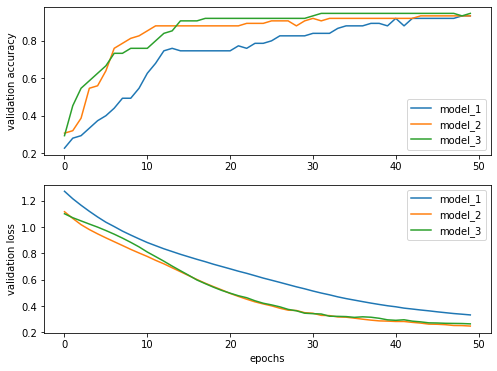

In [110]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)    
    ax2.plot(val_loss, label=model_name)
    
        
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

x_test:  [-1.50652052  0.78880759 -1.34022653 -1.18381211]
y_test:  [1. 0. 0.]
Printing each model prediction
y_pred:  [0.9669192  0.01690913 0.01617166]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.86      0.83      0.84        23
           2       0.85      0.88      0.86        25

    accuracy                           0.91        75
   macro avg       0.90      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75

[[27  0  0]
 [ 0 19  4]
 [ 0  3 22]]
Printing each model prediction
y_pred:  [9.9591100e-01 3.9545107e-03 1.3447688e-04]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.88      0.91      0.89        23
           2       0.92      0.88      0.90        25

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg      

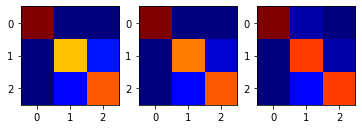

In [121]:
#print(Y_test)
#print(X_test)
print("x_test: ",X_test[0])

print("y_test: ",Y_test[0])

# convert encoded labels into classes: say [0, 0, 1] -->  [2] i.e Iris-virginica
y_test_class = np.argmax(Y_test,axis=1)
#print("y_test_class: ",y_test_class)

fig     = plt.figure(figsize=(6,8))

for i,model_name in enumerate(history_dict):
    plt.subplot(1, 3, i+ 1)
    model = history_dict[model_name][1]
    print("Printing each model prediction")
    y_pred = model.predict(X_test)
    print("y_pred: ",y_pred[0])
    # convert predicted labels into classes: say [0.00023, 0.923, 0.031] -->  [1] i.e. Iris-versicolor
    y_pred_class = np.argmax(y_pred,axis=1)
    #print("y_pred_class: ",y_pred_class)

    #Accuracy of the predicted values   
    print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
    #visualize the confusion matrix in a heat map
    cm = confusion_matrix(y_test_class, y_pred_class)
    print(cm)
    plt.imshow(cm,cmap='jet',interpolation="none",label='Confusion matrix')

